In [56]:
import numpy as np  # for nd arrays
import pandas as pd   # dataframes
import seaborn as sns   #plotting
import matplotlib.pyplot as plt
import warnings, string
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords       
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
uploaded = files.upload()

Saving Preprocessed Fake Reviews Detection Dataset (2).csv to Preprocessed Fake Reviews Detection Dataset (2) (1).csv


In [4]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset (2).csv')

In [5]:
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.columns

Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [8]:
df.isnull().sum().sum() #counts all null values

1

In [9]:
df.isnull().sum()     # gives count of null values in all columns

category    0
rating      0
label       0
text_       1
dtype: int64

In [10]:
df.count()

category    40432
rating      40432
label       40432
text_       40431
dtype: int64

In [11]:
df.dropna(inplace=True)  # removes all rows with null values and inplace helps retain change in original dataset

In [12]:
df['length'] = df['text_'].apply(len)          # counts length of values in column 'text_' and stores that in seperate column 'length'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [14]:
df.describe()

,rating,length
count,40431.000000,40431.000000
mean,4.256585,192.154040
std,1.144367,207.463498
min,1.000000,8.000000
25%,4.000000,59.000000
50%,5.000000,108.000000
75%,5.000000,236.000000
max,5.000000,2199.000000


(array([2.9966e+04, 5.8300e+03, 2.7200e+03, 1.2250e+03, 5.4400e+02,
        1.2400e+02, 1.3000e+01, 4.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([   8. ,  227.1,  446.2,  665.3,  884.4, 1103.5, 1322.6, 1541.7,
        1760.8, 1979.9, 2199. ]),
 <a list of 10 Patch objects>)

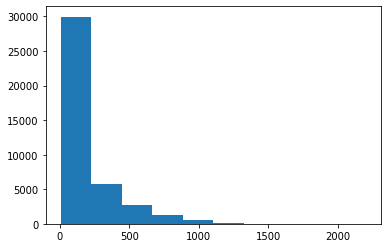

In [15]:
plt.hist(df['length'])

In [16]:
df.groupby('label').describe()   # creating groups as per values in label column

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
CG     159.269701  160.493040  11.0  52.0   91.0  197.0  1198.0  
OR     225.036753  241.169564   8.0  69.0  126.0  278.0  2199.0

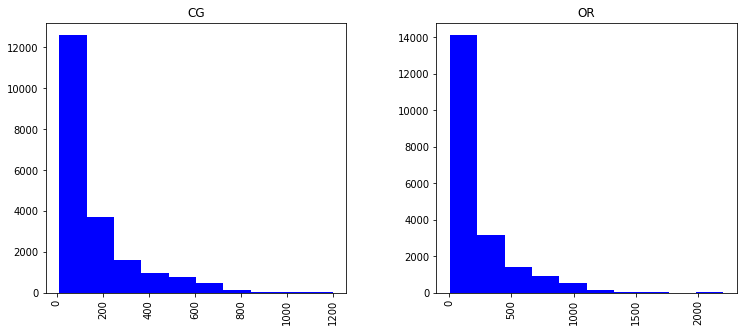

In [17]:
# plotting the length of reviews w.r.t each label
df['length'].hist(by=df['label'], color='blue', figsize=(12,5))
plt.show()

Extracting largest review

In [18]:
df.length.describe()

count    40431.000000
mean       192.154040
std        207.463498
min          8.000000
25%         59.000000
50%        108.000000
75%        236.000000
max       2199.000000
Name: length, dtype: float64

In [19]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"thought 'd purcha item also nbsp data-hook= `` product-link-link `` class= `` a-link-norm `` href= `` /kidco-door-knob-locks-clear-2-pack/dp/b0010cd2io/ref=cm_cr_arp_d_rvw_txt ie=utf8 `` kidco door knob lock clear 2 pack /a nbsp nbsp data-hook= `` product-link-link `` class= `` a-link-norm `` href= `` /door-knob-lock/dp/b00238meqa/ref=cm_cr_arp_d_rvw_txt ie=utf8 `` door knob lock /a white color nbsp data-hook= `` product-link-link `` class= `` a-link-norm `` href= `` /kidco-door-knob-lock-colors-white/dp/b001j2wjf2/ref=cm_cr_arp_d_rvw_txt ie=utf8 `` kidco door knob lock color white /a nbsp nbsp data-hook= `` product-link-link `` class= `` a-link-norm `` href= `` /door-knob-lock-2-pack/dp/b00069bvgm/ref=cm_cr_arp_d_rvw_txt ie=utf8 `` door knob lock 2 pack /a nbsp data-hook= `` product-link-link `` class= `` a-link-norm `` href= `` /secure-grip-clear-door-knob-covers-3-pack/dp/b00068xbxe/ref=cm_cr_arp_d_rvw_txt ie=utf8 `` secur grip clear door knob cover 3-pack /a nbsp compar two over f

In [20]:
df['text_'][300]

'good qualiti great price tad loo 15 `` mattress'

In [21]:
bow_transformer = CountVectorizer()
bow_transformer

CountVectorizer()

In [22]:
bow_transformer.fit(df['text_'])

CountVectorizer()

In [23]:
bow_transformer.vocabulary_

{'love': 16126,
 'well': 28702,
 'made': 16367,
 'sturdi': 25377,
 'comfort': 6517,
 'pretti': 20665,
 'great': 12080,
 'upgrad': 27822,
 'origin': 18975,
 've': 28024,
 'mine': 17267,
 'coupl': 7026,
 'year': 29447,
 'pillow': 20023,
 'save': 22953,
 'back': 3393,
 'look': 16046,
 'feel': 10370,
 'miss': 17384,
 'inform': 13906,
 'use': 27883,
 'product': 20790,
 'price': 20686,
 'nice': 18282,
 'set': 23448,
 'good': 11885,
 'qualiti': 21159,
 'two': 27279,
 'month': 17606,
 'want': 28480,
 'differ': 8257,
 'flavor': 10696,
 'perfect': 19752,
 'touch': 26803,
 'thing': 26386,
 'wish': 29037,
 'littl': 15920,
 'space': 24587,
 'done': 8674,
 'fit': 10628,
 'smooth': 24262,
 'edg': 9224,
 'extra': 10061,
 'big': 4053,
 'number': 18589,
 'easi': 9154,
 'read': 21540,
 'like': 15803,
 'size': 23995,
 'son': 24479,
 'also': 2250,
 'babi': 3382,
 'adverti': 1903,
 '5th': 1184,
 'one': 18844,
 'problem': 20763,
 'realli': 21568,
 'handi': 12494,
 'kid': 14977,
 'tool': 26721,
 'includ': 137

In [24]:
print("Total vocabulary: ", len(bow_transformer.vocabulary_))

Total vocabulary:  29690


In [25]:
review200 = df['text_'][200]
review200

'perfect candi buffet certainli multipurpo'

In [26]:
bt = bow_transformer.transform([review200])

In [27]:
print(bt)

  (0, 4925)	1
  (0, 5277)	1
  (0, 5676)	1
  (0, 17859)	1
  (0, 19752)	1


In [28]:
print(bt.shape)

(1, 29690)


In [29]:
print(bow_transformer.get_feature_names()[19752])

perfect


In [30]:
bow_reviews = bow_transformer.transform(df['text_'])

In [31]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 29690)
Amount of non zero values in the bag of words model: 1022944


In [32]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.09


In [33]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_bt = tfidf_transformer.transform(bt)
print(tfidf_bt)

  (0, 19752)	0.20349864514950194
  (0, 17859)	0.5470122748387846
  (0, 5676)	0.3465696429464138
  (0, 5277)	0.45681003288827504
  (0, 4925)	0.5749608239163982


In [34]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.819393433430175


In [35]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 29690)
No. of Dimensions: 2


Creating training and testing data

In [36]:
rev_train, rev_test, lab_train, lab_test = train_test_split(df['text_'], df['label'], test_size=0.35)

In [37]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [48]:
pipeline.fit(rev_train,lab_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9c92331d30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [51]:
predictions = pipeline.predict(rev_test)
predictions


array(['CG', 'OR', 'OR', ..., 'CG', 'CG', 'CG'], dtype='<U2')

In [54]:
print('Classification Report:',classification_report(lab_test,predictions))
print('Confusion Matrix:',confusion_matrix(lab_test,predictions))
print('Accuracy Score:',accuracy_score(lab_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      7036
          OR       0.88      0.81      0.84      7115

    accuracy                           0.85     14151
   macro avg       0.85      0.85      0.85     14151
weighted avg       0.85      0.85      0.85     14151

Confusion Matrix: [[6253  783]
 [1379 5736]]
Accuracy Score: 0.8472192777895555


In [57]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(lab_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 84.72%


In [58]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])


random forest

In [59]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [60]:
pipeline.fit(rev_train,lab_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9c92331d30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [61]:
rfc_pred = pipeline.predict(rev_test)
rfc_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [62]:
print('Classification Report:',classification_report(lab_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(lab_test,rfc_pred))
print('Accuracy Score:',accuracy_score(lab_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(lab_test,rfc_pred)*100,2)) + '%')


Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.88      0.84      7036
          OR       0.87      0.80      0.83      7115

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6192  844]
 [1451 5664]]
Accuracy Score: 0.8378206487174051
Model Prediction Accuracy: 83.78%


DecisionTreeClassifier

In [62]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])


In [62]:
pipeline.fit(rev_train,lab_train)

In [63]:
dtree_pred = pipeline.predict(rev_test)
dtree_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [64]:
print('Classification Report:',classification_report(lab_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(lab_test,dtree_pred))
print('Accuracy Score:',accuracy_score(lab_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(lab_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.88      0.84      7036
          OR       0.87      0.80      0.83      7115

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6192  844]
 [1451 5664]]
Accuracy Score: 0.8378206487174051
Model Prediction Accuracy: 83.78%
